In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    try:
        return np.array(((x[0]-3)**2 + (x[1] - 1)**2))
    except:
        print("This function need x1 and x2")

def grad_f1(x):
    try:
        return np.array((2*(x[0]-3), 2*(x[1]-1)))
    except:
        print("This function need x1 and x2")


def f2(x):
    try:
        return np.array((10*((x[0]-1)**2) + (x[1]-2)**2))
    except:
        print("This function need x1 and x2")

def grad_f2(x):
    try:
        return np.array((20*(x[0]-1), 2*(x[1]-2)))
    except:
        print("This function need x1 and x2")

def f5(x):
    try:
        return np.array((x[0]**4 + x[0]**3 - 2*(x[0]**2) - 2*x[0]))
    except:
        print("This function need x1")

def grad_f5(x):
    try:
        return np.array((4*x[0]**3 + 3*x[0]**2 - 4*x[0] -2))
    except:
        print("This function need x1")



In [2]:
n=1
lambdaa = 1

def f3(x):
    #print(n)
    A = np.vander(np.linspace(0, 1, n))
    x_true = np.ones(n).T
    b = A@x_true
    #print(A.shape, x.shape, b.shape)
    return np.array((0.5*np.linalg.norm(A@x-b, 2)**2))


def grad_f3(x):
    A = np.vander(np.linspace(0, 1, n))
    x_true = np.ones(n).T
    b = A@x_true
    return np.array((A.T @ (A@x-b)))


def f4(x):
    A = np.vander(np.linspace(0, 1, n))
    x_true = np.ones(n).T
    b = A@x_true
    return np.array((0.5*np.linalg.norm(A@x-b, 2)**2 + (lambdaa/2)*np.linalg.norm(x, 2)**2 ))


def grad_f4(x):
    A = np.vander(np.linspace(0, 1, n))
    x_true = np.ones(n).T
    b = A@x_true
    return np.array((A.T @ (A@x-b) + (lambdaa)*x))


In [3]:

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha


In [29]:
def contour(x):
    x = np.array(x)

    feature_x = np.linspace(-5.0, 11.0, 300)
    feature_y = np.linspace(-5.0, 11.0, 300)

    [X, Y] = np.meshgrid(feature_x, feature_y)

    Z = f1((X, Y))

    fig, ax = plt.subplots(1, 1)
    ax.contourf(X, Y, Z)
    ax.set_title('f1')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    plt.plot(x[:,0], x[:,1], 'o-')
    plt.show()


In [30]:
# alpha = 0.05
# def getAlpha():
#     return alpha

# def setAlpha(x):
#     global alpha
#     alpha = x

def GD(f, grad_f, x0, kmax:int, tolf:float, tolx:float, alpha):
    # As output we want:
    # x -> The stationary point
    # k an integer, the number of iteration to the convergence
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of || grad_f(x_k) || for any k
    
    # alpha = getAlpha()
    allx = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err_val = [np.linalg.norm(grad_f((x0)))]
    k = 0

    first = True

    while k<kmax and \
        np.linalg.norm(grad_f((x0))) >= tolf*np.linalg.norm(grad_f((allx[0]))) and \
            (first or np.linalg.norm(x0 - allx[-2]) >= tolx*np.linalg.norm(allx[0])):

        first = False
        
        # Updare x
        x = x0 - alpha*grad_f((x0))
        
        # save the values
        allx.append(x)
        f_val.append(f(x))
        err_val.append(np.linalg.norm(grad_f((x))))
        grads.append(grad_f((x)))

        # Update k 
        k += 1
        
        # restart
        x0 = x

        #print(x0, allx[-1],grad_f((x0)), "\n",np.linalg.norm(x0 - allx[-1]), tolx*np.linalg.norm(allx[0]))

    return allx, k, f_val, grads, err_val


def GDbacktracking(f, grad_f, x0, kmax:int, tolf:float, tolx:float):
    # As output we want:
    # x -> The stationary point
    # k an integer, the number of iteration to the convergence
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of || grad_f(x_k) || for any k
    
    alpha = backtracking(f, grad_f, x0)
    allx = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err_val = [np.linalg.norm(grad_f((x0)))]
    k = 0

    first = True

    while k<kmax and \
        np.linalg.norm(grad_f((x0))) >= tolf*np.linalg.norm(grad_f((allx[0]))) and \
            (first or np.linalg.norm(x0 - allx[-2]) >= tolx*np.linalg.norm(allx[0])):

        first = False
        
        # Updare x
        x = x0 - alpha*grad_f((x0))
        
        # save the values
        allx.append(x)
        f_val.append(f(x))
        err_val.append(np.linalg.norm(grad_f((x))))
        grads.append(grad_f((x)))

        # Update k 
        k += 1
        
        # update alpha
        alpha=backtracking(f, grad_f, x0)

        # restart
        x0 = x

        #print(x0, allx[-1],grad_f((x0)), "\n",np.linalg.norm(x0 - allx[-1]), tolx*np.linalg.norm(allx[0]))

    return allx, k, f_val, grads, err_val

In [31]:
def printPlots(k, errs, xs, minimum, des):
    kmax = max(k)

    plt.figure(figsize=(20,6))
    
    plt.subplot(1,3,1)
    for i in range(len(des)):
        plt.plot(list(range(0, k[i]+1, 1)), errs[i])
        plt.title('Errors per iteration')
        plt.xlabel('k')
        plt.ylabel('err')
        plt.grid()

    plt.subplot(1,3,2)
    for i in range(len(des)):
        res = []
        for x in xs[i]:
            res.append(np.linalg.norm(minimum-x, 2))
        #res = xs[i] - minimum
        plt.plot(list(range(0, k[i]+1, 1)), res)
        plt.title('Distance from the minimum')
        plt.xlabel('k')
        plt.ylabel('Distance from the minimum')
        plt.grid()

    plt.subplot(1,3,3)
    for i in range(len(des)):
        res = []
        for x in xs[i]:
            #print(x, xs[-1])
            res.append(np.linalg.norm(x-xs[i][-1], 2))
        #res = xs[i] - minimum
        plt.plot(list(range(0, k[i]+1, 1)), res)
        plt.title('Distance from x*')
        plt.xlabel('k')
        plt.ylabel('Distance from x*')
        plt.grid()

    plt.legend(des)
    plt.show()


In [32]:
def callGD(function:str, f, grad_f, x0, kmax, tolf, tolx, xs, k, f_val, grads, err_val, alpha=None):
    if function == 'GD':
        a, b, c, d, e = GD(f, grad_f, x0, kmax, tolf, tolx, alpha)
    if function == 'GDbacktracking':
        a, b, c, d, e = GDbacktracking(f, grad_f, x0, kmax, tolf, tolx)
    xs.append(a)
    k.append(b)
    f_val.append(c)
    grads.append(d)
    err_val.append(e)

In [33]:
def exec1(f, grad_f, alphas, alpha, minimum):
    print(f"Execution for {f.__name__}")
    kmax = 100
    tolf = tolx = 10e-5

    xs = []
    k = []
    f_val = []
    grads = []
    errs = []

    
    callGD('GD', f, grad_f, np.array([0.0, 0.0]), kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[0])
    callGD('GD', f, grad_f, np.array([0.0, 0.0]), kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[1])
    callGD('GD', f, grad_f, np.array([10.0, 10.0]), kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[0])
    callGD('GD', f, grad_f, np.array([10.0, 10.0]), kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[1])
    callGD('GD', f, grad_f, np.array([0.0, 0.0]), kmax, 10e-3, 10e-3, xs, k, f_val, grads, errs, alphas[1])
    
    printPlots(k, errs, xs, minimum, ['GD alpha='+str(alphas[0])+' from (0,0)', 'GD alpha='+str(alphas[1])+' from (0,0)', \
        'GD alpha='+str(alphas[0])+'from (10,10)', 'GD alpha='+str(alphas[1])+' from (10,10)', \
            'GD alpha='+str(alphas[1])+' from (0,0) with higher tolerance'])

    # x1 = xs[3]
    # x2 = xs[4]

    xs = []
    k = []
    f_val = []
    grads = []
    errs = []

    callGD('GDbacktracking',  f, grad_f, np.array([0.0, 0.0]), kmax, tolf, tolx, xs, k, f_val, grads, errs)
    callGD('GDbacktracking',  f, grad_f, np.array([10.0, 10.0]), kmax, tolf, tolx, xs, k, f_val, grads, errs)
    callGD('GDbacktracking',  f, grad_f, np.array([10.0, 10.0]), kmax, 10e-3, 10e-3, xs, k, f_val, grads, errs)
    printPlots(k, errs, xs, minimum, ['GDbacktracking from (0,0)', 'GDbacktracking from (10,10)', \
        'GDbacktracking from (10,10) with higher tolerance'])
    #x, k, f_val, grads, err_val = GDbacktracking(f1, grad_f1, np.array([0.0, 0.0]), kmax, tolf, tolx)

    # contour(x1)
    # contour(x2)

    contour(xs[1])
    contour(xs[2])


Execution for f1


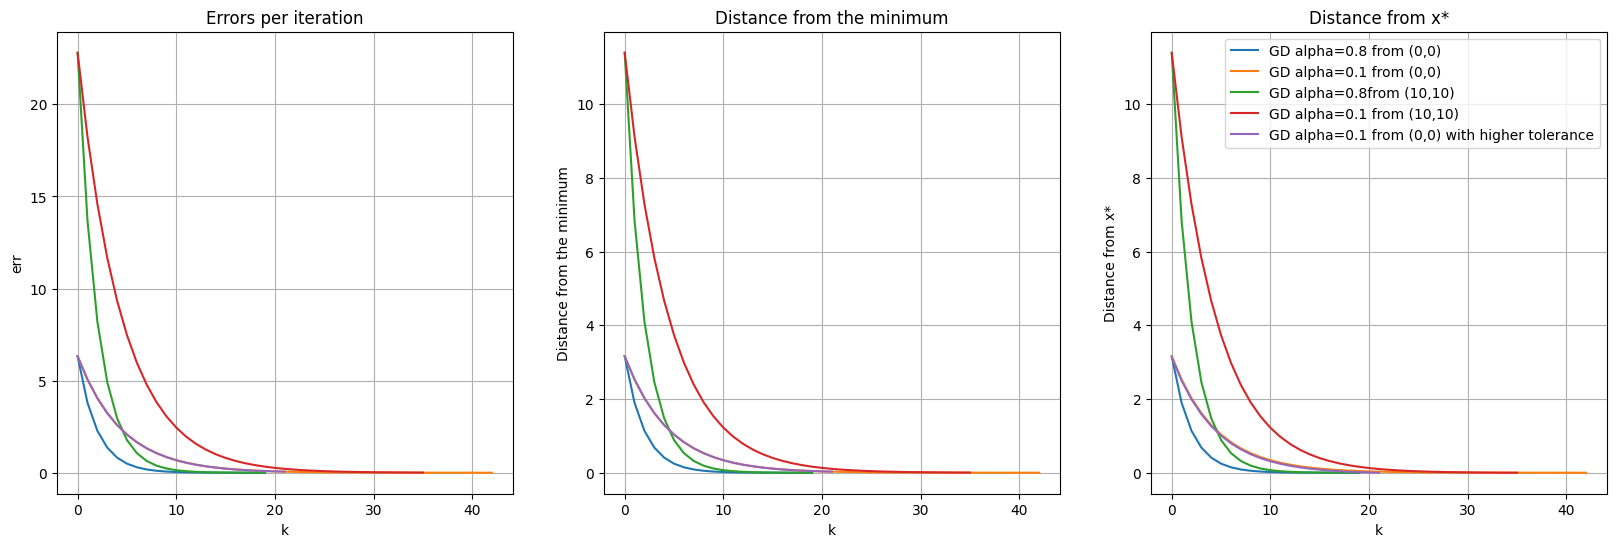

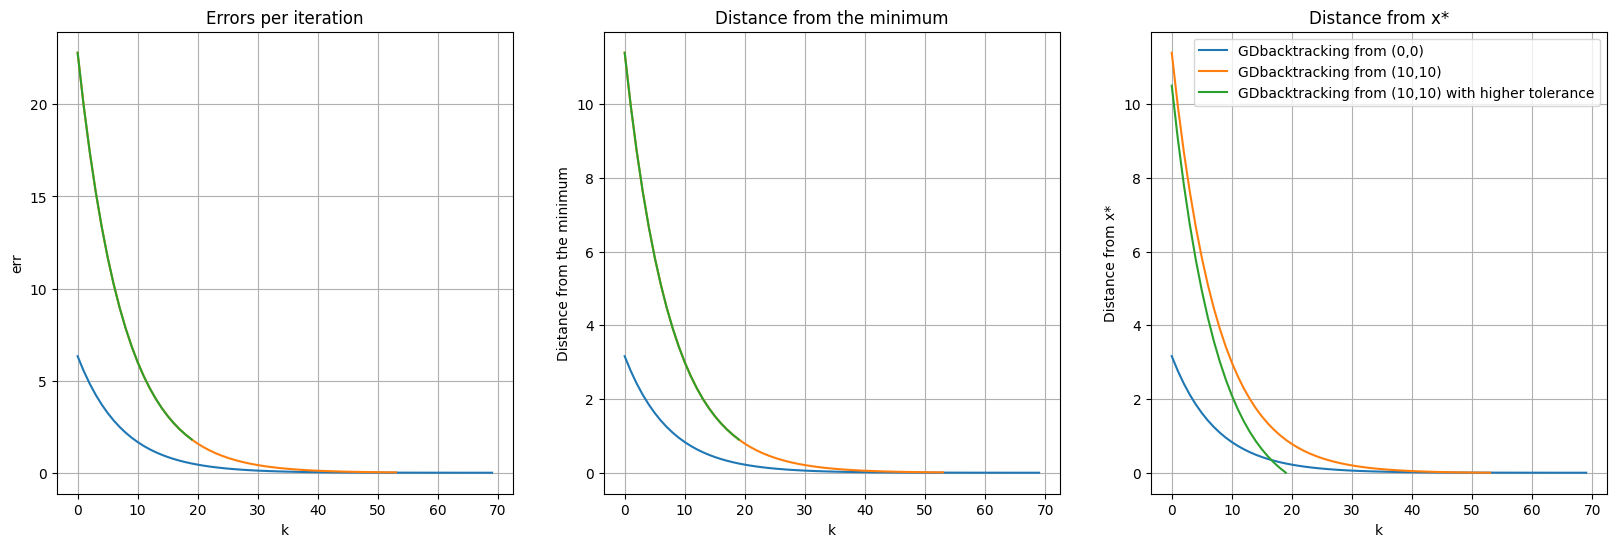

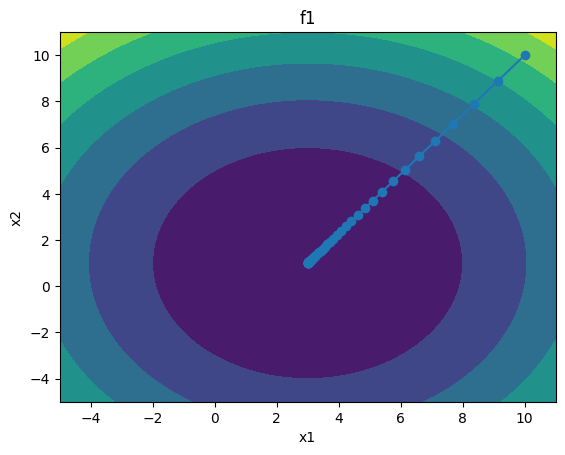

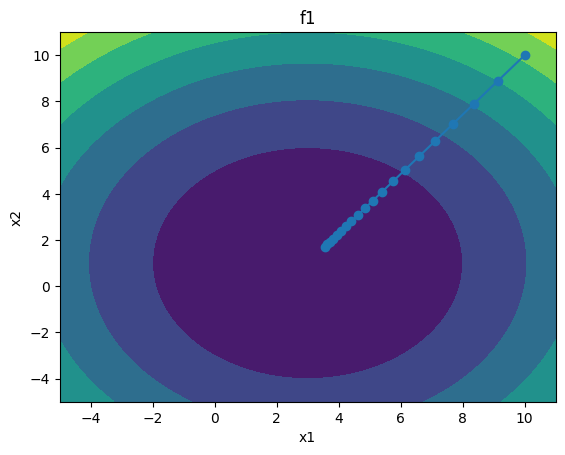

In [34]:
exec1(f1, grad_f1, [0.8, 0.1], 1, np.array([3,1]))

Execution for f2


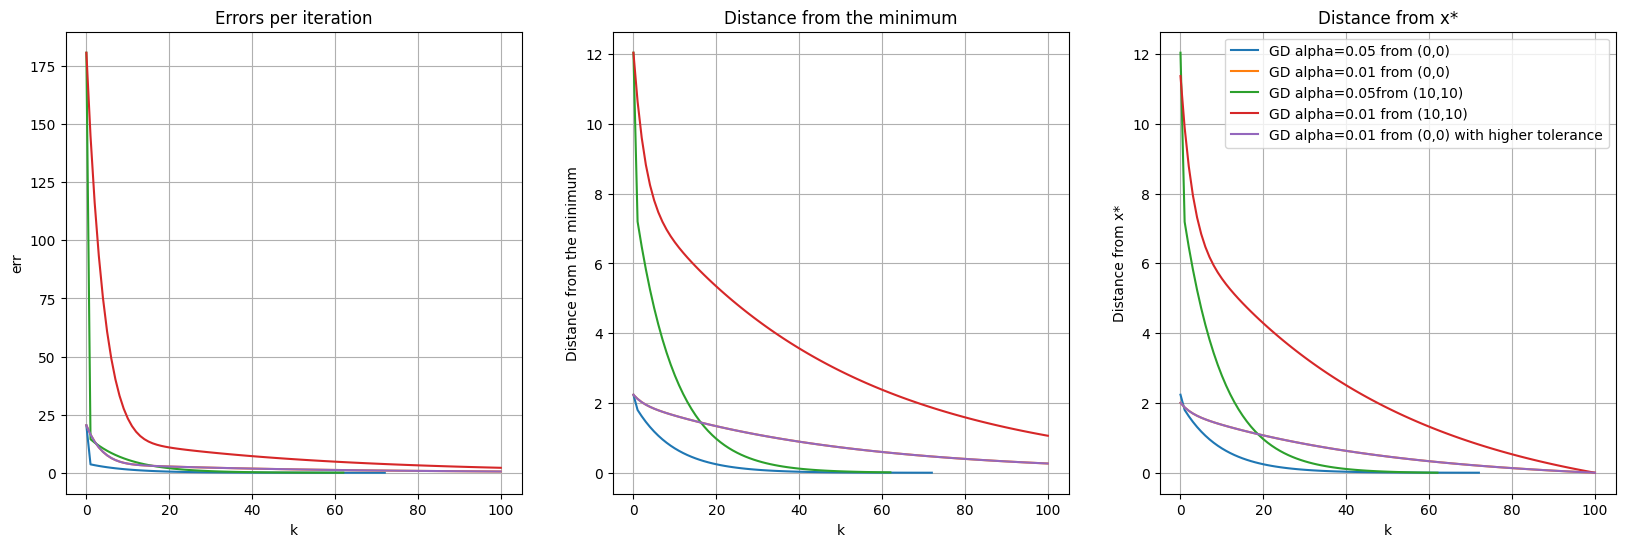

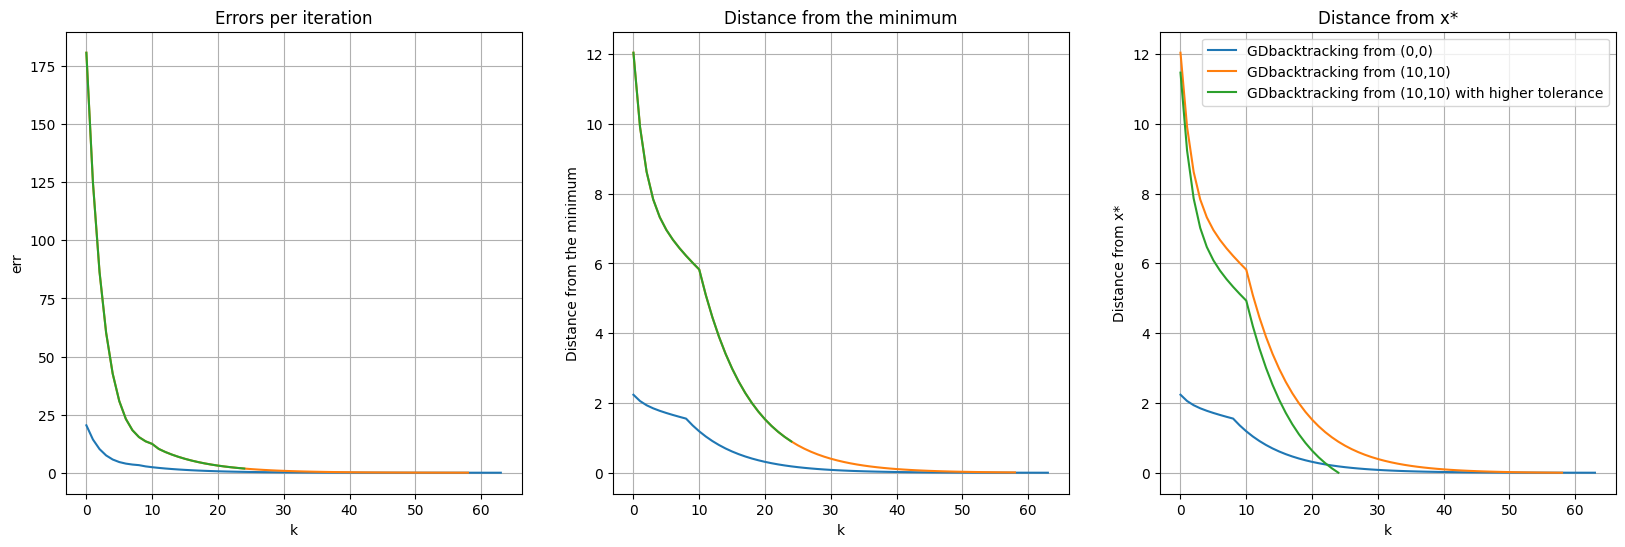

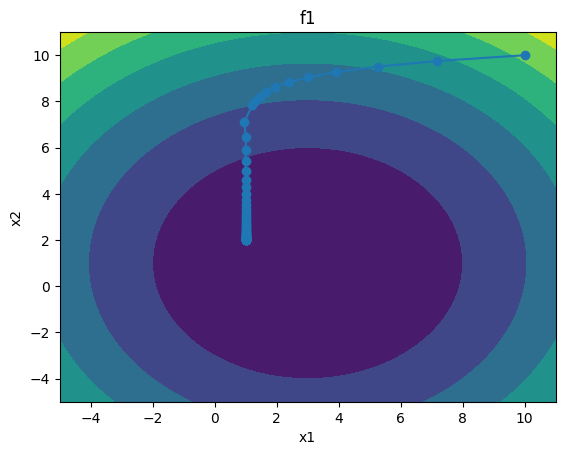

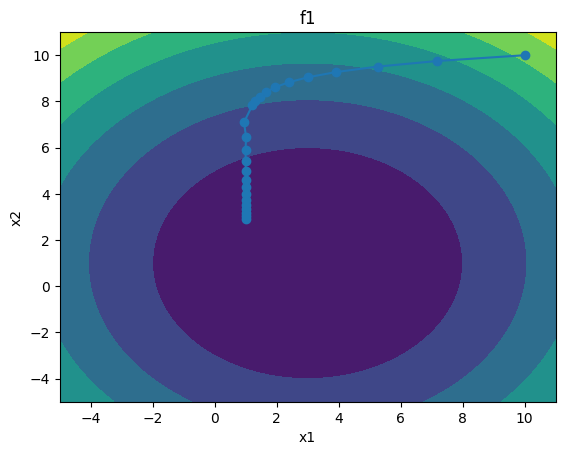

In [35]:
exec1(f2, grad_f2, [0.05, 0.01], 1, np.array([1,2]))

In [36]:
def printErrors(k, errs, des, idx):
    if idx == 1:
        plt.figure(figsize=(20,6))
    
    plt.subplot(1,3,idx)
    for i in range(len(des)):
        plt.plot(list(range(0, k[i]+1, 1)), errs[i])
        plt.title('Errors per iteration for k='+str(n))
        plt.xlabel('k')
        plt.ylabel('err')
        plt.grid()

    # plt.subplot(1,2,2)
    # for i in range(len(des)):
    #     res = []
    #     for x in xs[i]:
    #         res.append(np.linalg.norm(x-minimum, 2))
    #     #res = xs[i] - minimum
    #     plt.plot(list(range(0, k[i]+1, 1)), res)
    #     plt.title('Distance from the minimum')
    #     plt.xlabel('k')
    #     plt.ylabel('Distance from the minimum')
    #     plt.grid()
    
    if idx == 3:
        plt.legend(des)
        plt.show()



def exec2(f, grad_f, x0, alphas, idx):
    print(f"Execution for {f.__name__}")
    kmax = 100
    tolf = tolx = 10e-5

    xs = []
    k = []
    f_val = []
    grads = []
    errs = []

    callGD('GD', f, grad_f, x0, kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[0])
    callGD('GD', f, grad_f, x0, kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[1])
    callGD('GD', f, grad_f, x0, kmax, 10e-3, 10e-3, xs, k, f_val, grads, errs, alphas[1])
    
    #printErrors(k, errs, ['GD alpha='+str(alphas[0])+' from (0,0)', 'GD alpha='+str(alphas[1])+' from (0,0)', \
     #       'GD alpha='+str(alphas[1])+' from (0,0) with higher tolerance'])

    des = ['GD alpha='+str(alphas[0])+' from (0,0)', 'GD alpha='+str(alphas[1])+' from (0,0)', \
            'GD alpha='+str(alphas[1])+' from (0,0) with higher tolerance', \
                'GDbacktracking from (0,0)', 'GDbacktracking from (0,0) with higher tolerance']

    callGD('GDbacktracking',  f, grad_f, x0, kmax, tolf, tolx, xs, k, f_val, grads, errs)
    callGD('GDbacktracking',  f, grad_f, x0, kmax, 10e-3, 10e-3, xs, k, f_val, grads, errs)
    #printErrors(k, errs, des, idx)

    printPlots(k, errs, xs, np.ones(n), des)
    #x, k, f_val, grads, err_val = GDbacktracking(f1, grad_f1, np.array([0.0, 0.0]), kmax, tolf, tolx)



Execution for f3


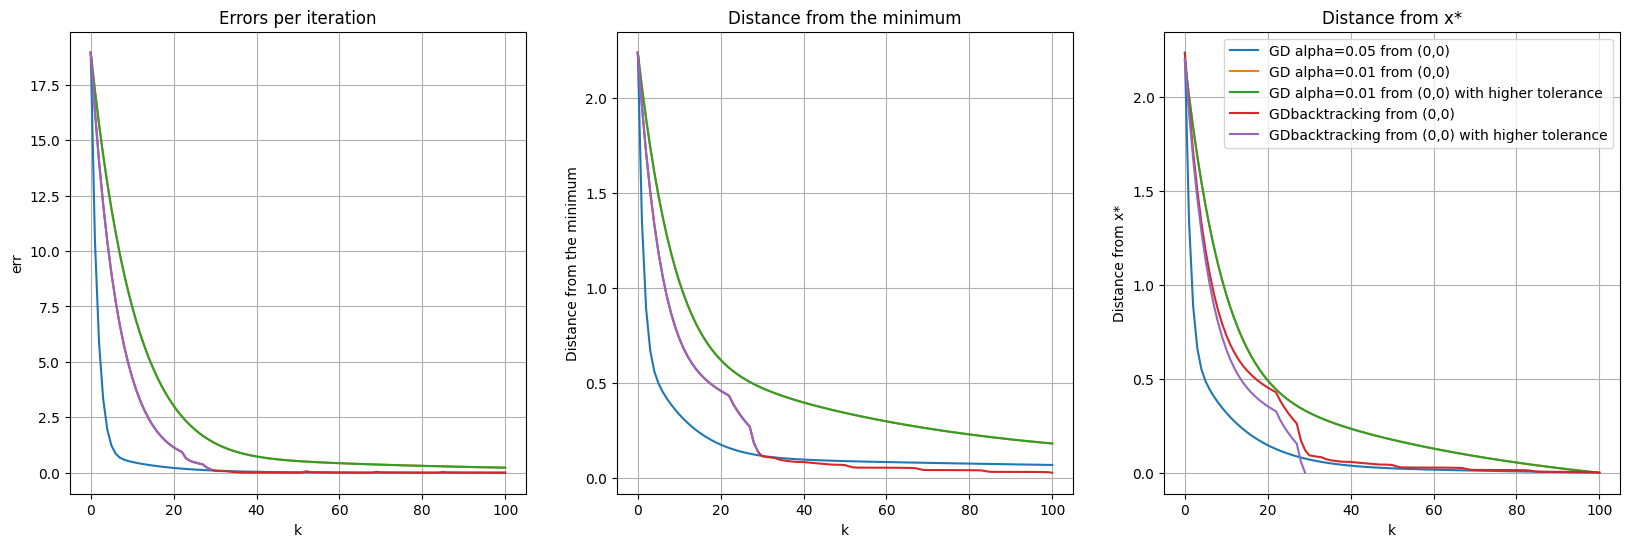

Execution for f3


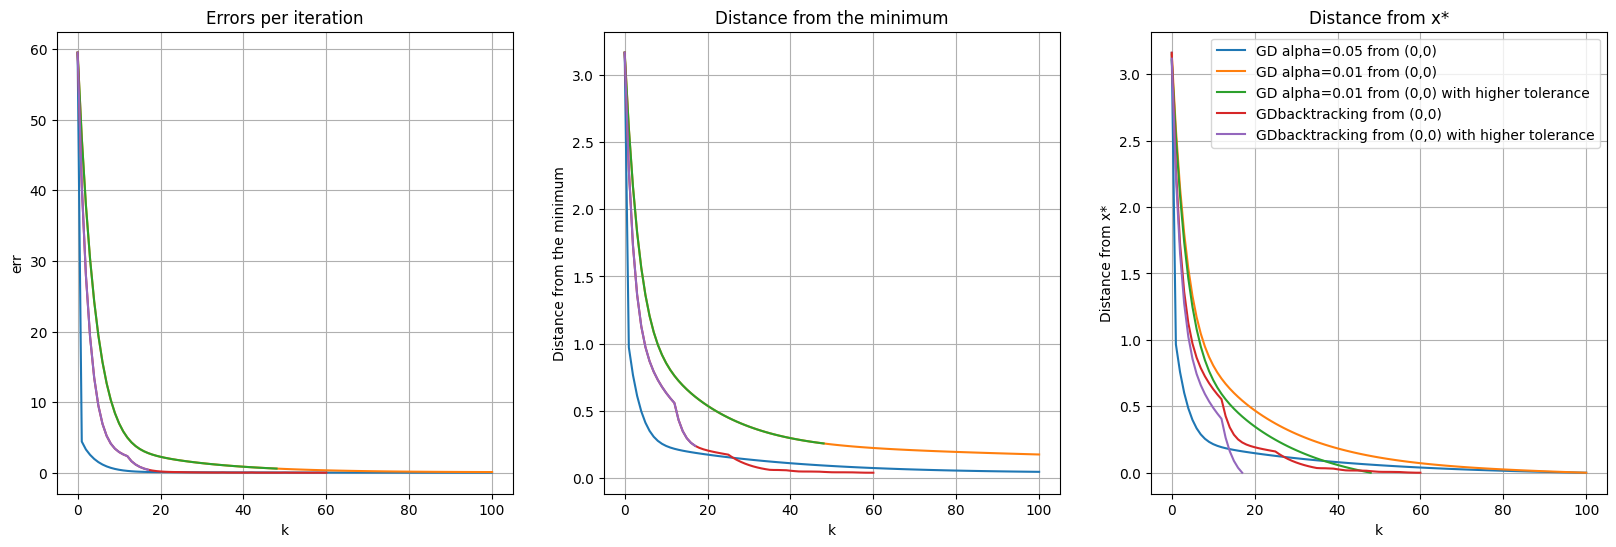

Execution for f3


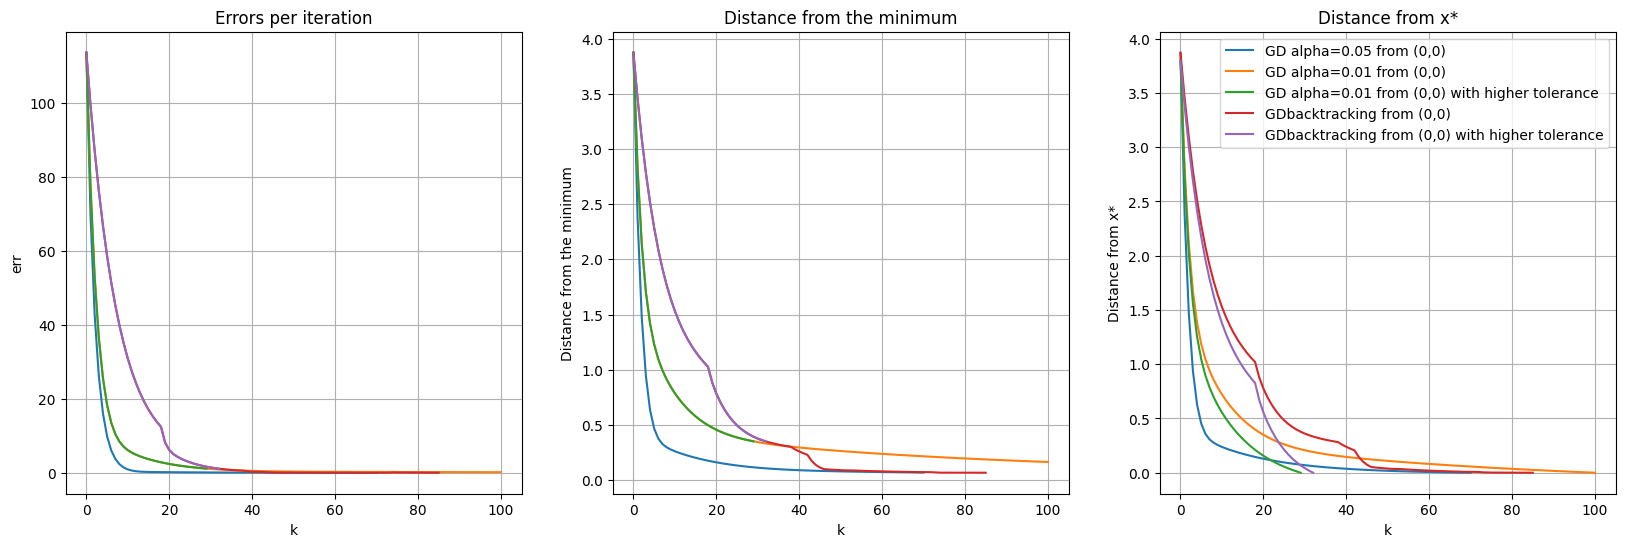

In [37]:
n=5
exec2(f3, grad_f3, np.zeros(n), [0.05, 0.01], 1)
n=10
exec2(f3, grad_f3, np.zeros(n), [0.05, 0.01], 2)
n=15
exec2(f3, grad_f3, np.zeros(n), [0.05, 0.01], 3)

Execution for lambda=0.5
Execution for f4


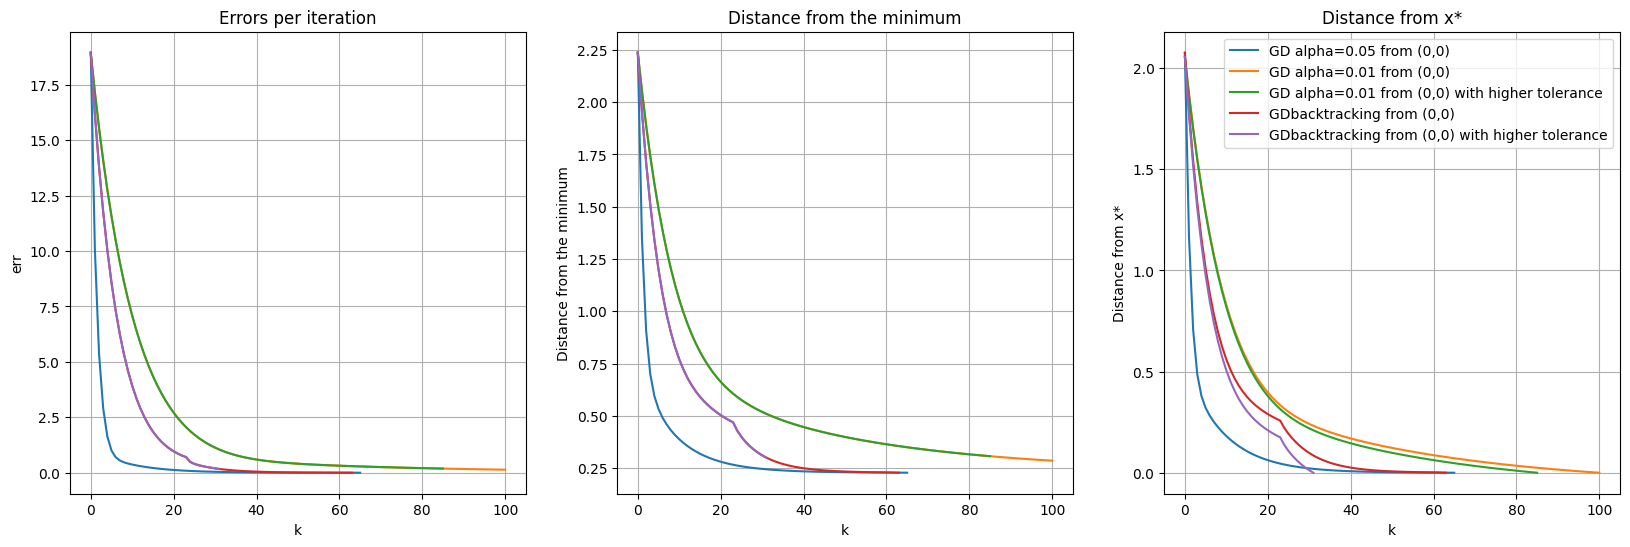

Execution for f4


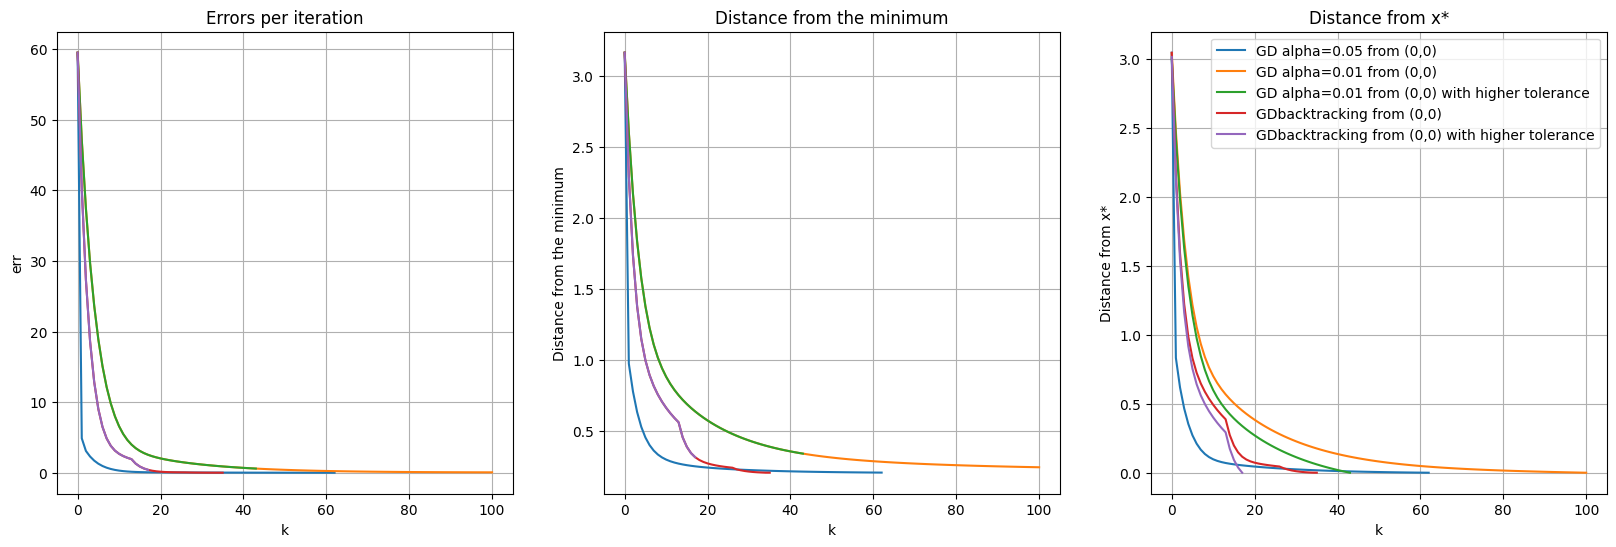

Execution for f4


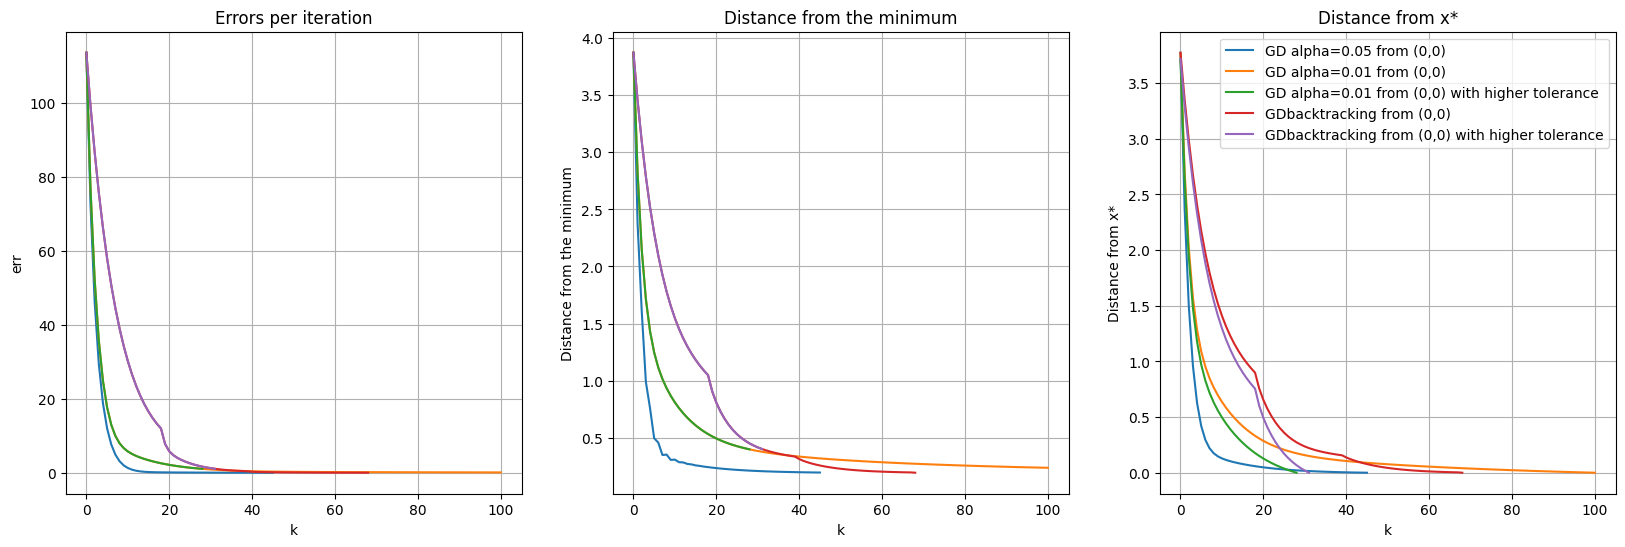

Execution for lambda=1
Execution for f4


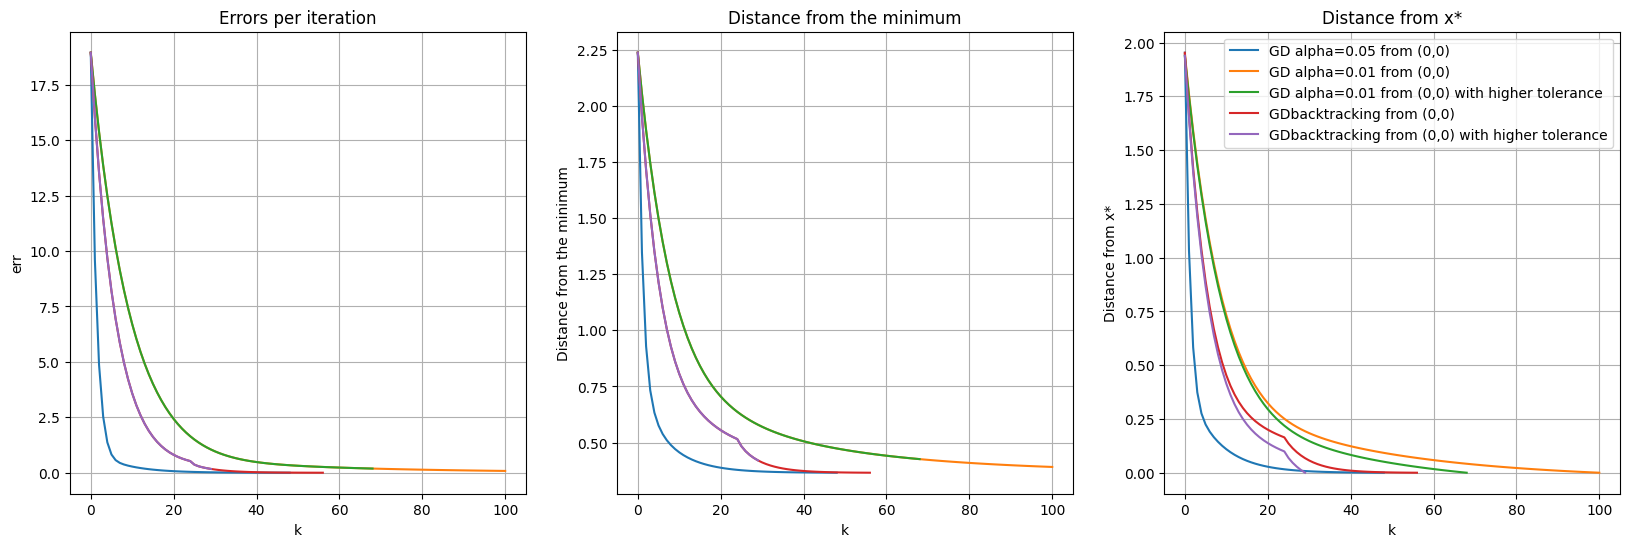

Execution for f4


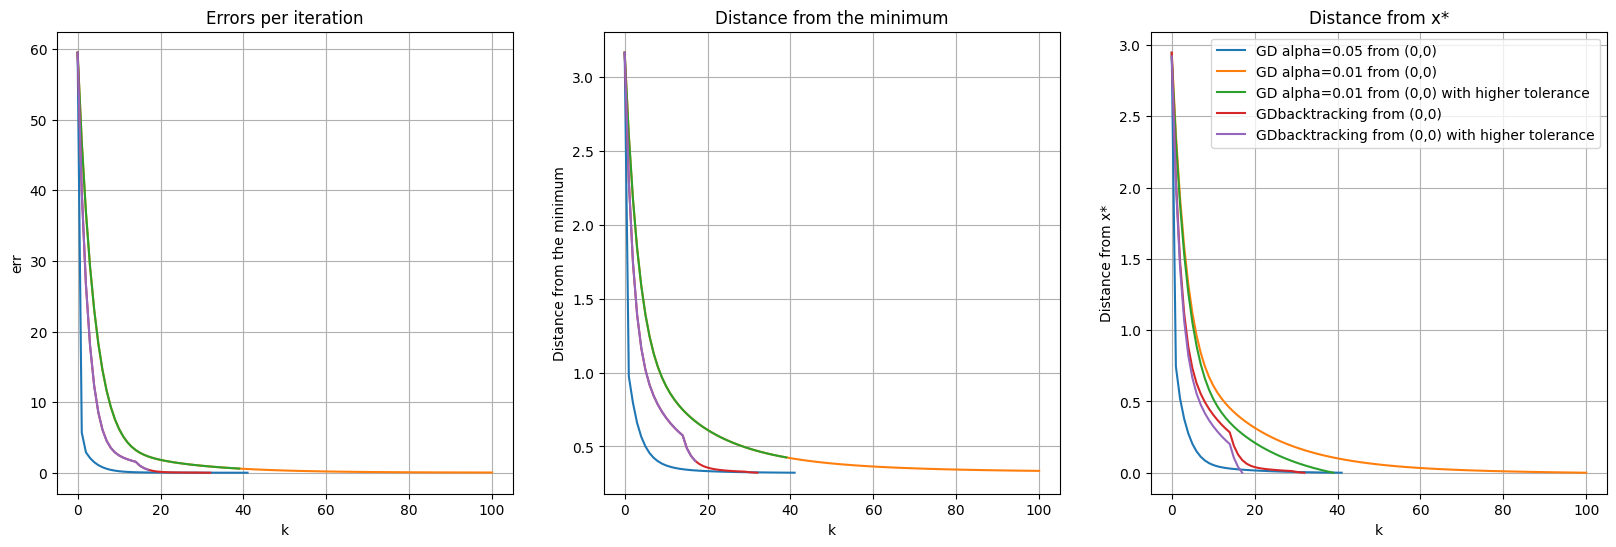

Execution for f4


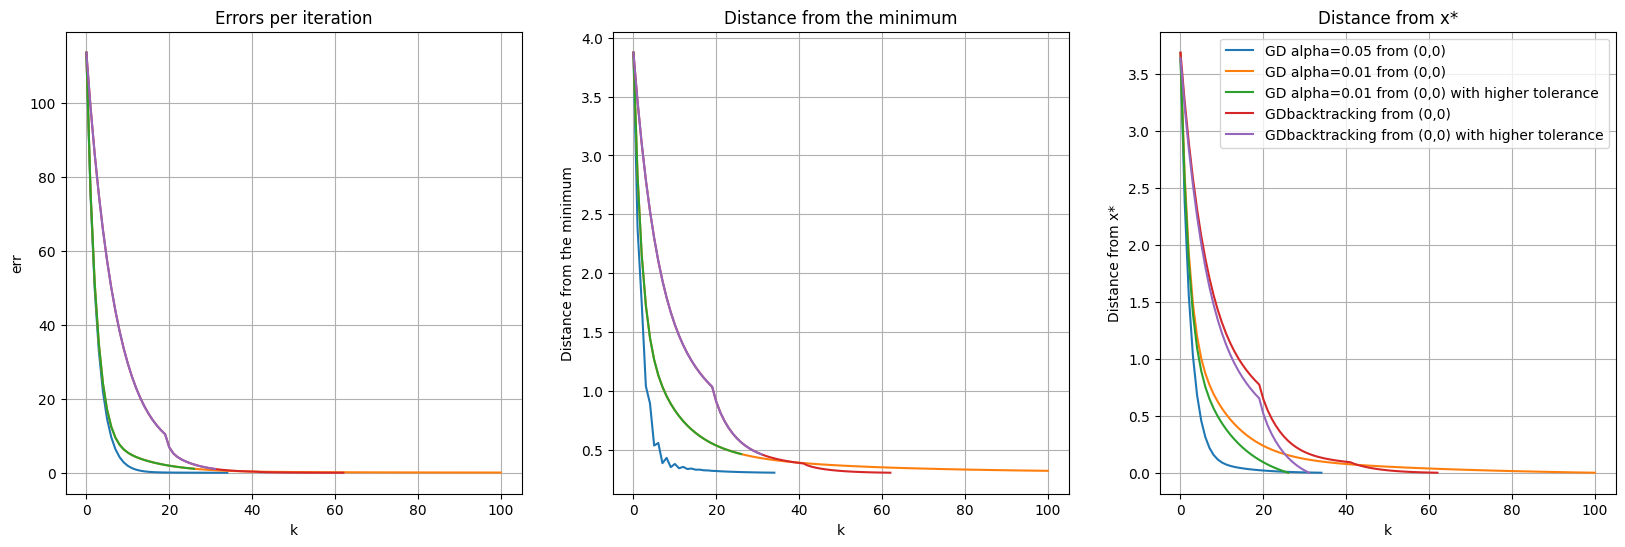

In [38]:
lambdaa = 0.5
print(f"Execution for lambda={lambdaa}")
n=5
exec2(f4, grad_f4, np.zeros(n), [0.05, 0.01], 1)
n=10
exec2(f4, grad_f4, np.zeros(n), [0.05, 0.01], 2)
n=15
exec2(f4, grad_f4, np.zeros(n), [0.05, 0.01], 3)

lambdaa = 1
print(f"Execution for lambda={lambdaa}")
n=5
exec2(f4, grad_f4, np.zeros(n), [0.05, 0.01], 1)
n=10
exec2(f4, grad_f4, np.zeros(n), [0.05, 0.01], 2)
n=15
exec2(f4, grad_f4, np.zeros(n), [0.05, 0.01], 3)

In [39]:
def printErrors2(k, errs, des):
    plt.figure(figsize=(12,6))
    
    #plt.subplot(1,3,idx)
    for i in range(len(des)):
        plt.plot(list(range(0, k[i]+1, 1)), errs[i])
        plt.title('Errors per iteration')
        plt.xlabel('k')
        plt.ylabel('err')
        plt.grid()
    
    plt.legend(des)
    plt.show()


def printFunction(xs, f_val, des, mini, maxi):
    #print(len(xs), len(f_val))
    plt.figure(figsize=(15,6))
    plt.xticks(np.arange(mini, maxi, 0.3))
    for i in range(len(des)):
        #print(xs[i].shape, f_val[i].shape)
        plt.plot(xs[i], f_val[i])
        plt.title('Function f5')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
    
    plt.legend(des)
    plt.show()


def exec3(f, grad_f, alphas, x0):
    print(f"Execution for {f.__name__}")
    kmax = 100
    tolf = tolx = 10e-4

    xs = []
    k = []
    f_val = []
    grads = []
    errs = []

    callGD('GD', f, grad_f, x0[0], kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[0])
    callGD('GD', f, grad_f, x0[0], kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[1])
    callGD('GD', f, grad_f, x0[1], kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[0])
    callGD('GD', f, grad_f, x0[1], kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[1])
    callGD('GD', f, grad_f, x0[2], kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[0])
    callGD('GD', f, grad_f, x0[2], kmax, tolf, tolx, xs, k, f_val, grads, errs, alphas[1])
    
    printErrors2(k, errs, ['GD alpha='+str(alphas[0])+' from '+str(x0[0]), 'GD alpha='+str(alphas[1])+' from '+str(x0[0]),\
        'GD alpha='+str(alphas[0])+' from '+str(x0[1]), 'GD alpha='+str(alphas[1])+' from '+str(x0[1]),\
            'GD alpha='+str(alphas[0])+' from '+str(x0[2]), 'GD alpha='+str(alphas[1])+' from '+str(x0[2])])

    
    printFunction(xs, f_val, ['GD alpha='+str(alphas[0])+' from '+str(x0[0]), 'GD alpha='+str(alphas[1])+' from '+str(x0[0]),\
        'GD alpha='+str(alphas[0])+' from '+str(x0[1]), 'GD alpha='+str(alphas[1])+' from '+str(x0[1]),\
            'GD alpha='+str(alphas[0])+' from '+str(x0[2]), 'GD alpha='+str(alphas[1])+' from '+str(x0[2])], min(x0), max(x0))


Execution for f5


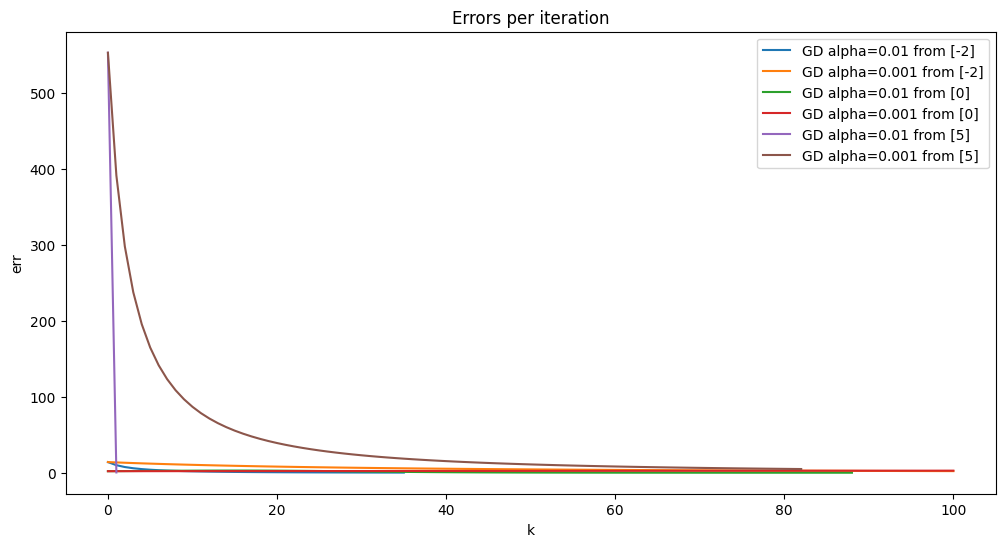

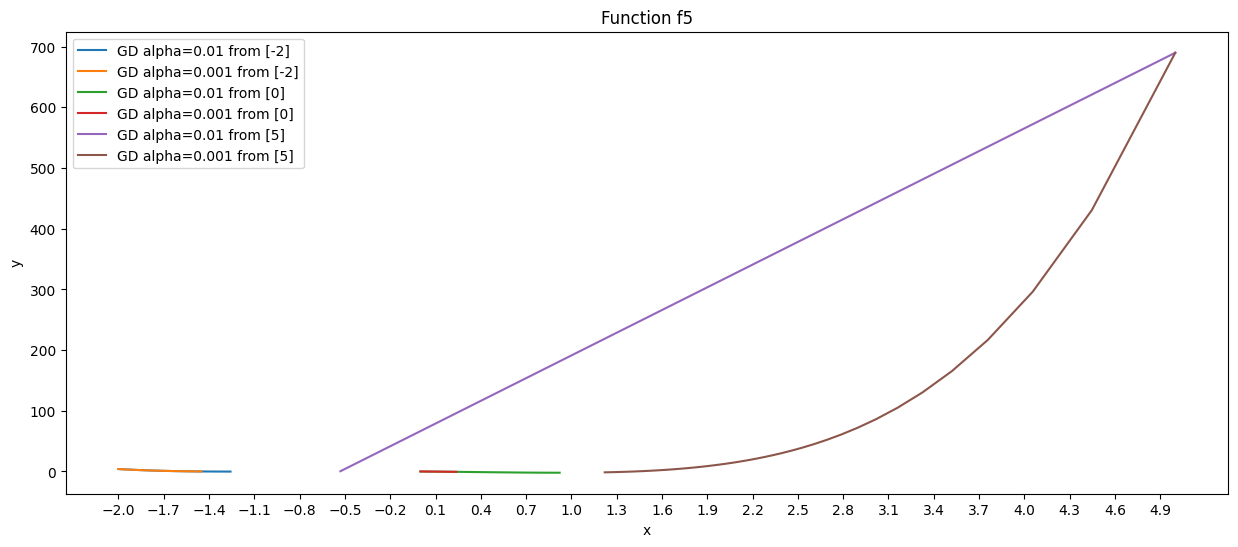

In [40]:
exec3(f5, grad_f5, [0.01, 0.001], [np.array([-2]), np.array([0]), np.array([5])])